### Import Library

In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [3]:
original = Image.open('/content/original.jpg')
tampered = Image.open('/content/data_test.jpg')

### Checking images format and size

In [4]:
print("Original Image Format:", original.format)
print("Tampered Image Format:", tampered.format)

print("Original image size:", original.size)
print("Tampered image size:", tampered.size)

Original Image Format: JPEG
Tampered Image Format: JPEG
Original image size: (740, 469)
Tampered image size: (1029, 661)


### Resizing and reformatting the images

In [5]:
original = original.resize((250,160))
print(original.size)
original.save('/content/original_saved.png')

tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('/content/tampered_save.png')

(250, 160)
(250, 160)


### Check the images

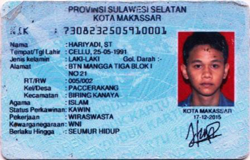

In [6]:
original

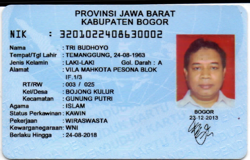

In [7]:
tampered

### Load images using CV2

In [8]:
original = cv2.imread('/content/original_saved.png')
tampered = cv2.imread('/content/tampered_save.png')

In [10]:
### Convert to Grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [11]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("Structural Similarity: {}".format(score))

Structural Similarity: 0.17420091185255343


### Calculating Threshold and Contours

In [13]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [15]:
for c in cnts:
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x,y), (x+w,y+h), (0,0,255),2 )
  cv2.rectangle(tampered, (x,y), (x+w,y+h), (0,0,255),2 )

### Display the images

Original Format Image


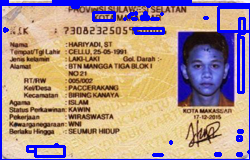

In [16]:
print('Original Format Image')
Image.fromarray(original)

Tampered Format Image


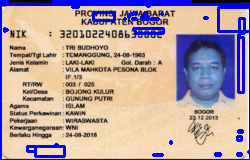

In [17]:
print('Tampered Format Image')
Image.fromarray(tampered)

Different Image


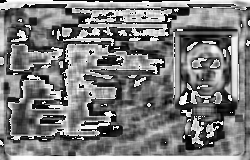

In [18]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


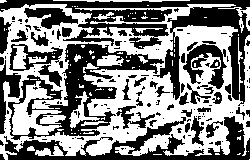

In [19]:
print('Threshold Image')
Image.fromarray(thresh)

# Summary

Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. 

Similarly, finding out the threshold and contours based on the threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.

As, our Structural Similarity is 17%

Finally we visualized the differences and similarities between the images using by displaying the images with contours difference and threshold